# Euler's method 

This notebook implements Euler's method (a.k.a forward Euler) for the integration of a  first order differential equation. 

We will be using <code>numpy</code>'s  matrix and vector capabilities and <code>math</code> to provide some trigonometric functions.

This workbook solves the equation
$$
\frac{dx}{dt}=cos x,\ x(0)=1
$$

The fist step is to define a function which calculates the RHS of the ODE.

In [1]:
import numpy as np
import math

# function defining ODE
def f(t,x):
    return math.cos(t)

Now we implement a generalised forward euler solver, this solves
$$ \frac{dx}{dt}=f(x,t),\ x(0)=x0 $$
by approximating the derivative using
$$x_{n+1)=x_n+\Delta t\cdot f(x,t)$$
The method is first order accurate in time, so a very small value of $\Delta t$ should be used to obtain good results.

In [2]:
def FwdEuler(t_stop,dt,x0,fun):
    """ General Forward Euler integrator, storing the time step and
    the results arrays, t and x.  The integtor will call the function,
    fun, and run at a time step of delta_t until t=t_stop.
    """

    # how many points
    N_t = int((float(t_stop)//dt))
    
    # initialise the storage array for the results
    x=np.zeros(N_t)
    t=np.linspace(0.0,t_stop,N_t)
    
    # iterations count
    for i in range(N_t-1):
        x[i+1]=x[i]+dt*fun(t[i],x[i]) #forward Euler
    return t,x


Now we are going to solve the equation for the first six seconds, with $\Delta t=0.1$.

In [3]:
# Call the integrator
t,x=FwdEuler(6.0,0.01,1.0,f)


Now we are going to plot the result

Text(0, 0.5, 'x(t)')

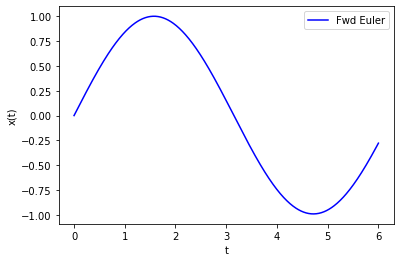

In [5]:
import matplotlib.pyplot as plt

# how many points?
N_t=len(x)

# dots or a continuous line?
numerical_sol = 'bo' if N_t < 70 else 'b-'

# plot the solution
plt.plot(t, x, numerical_sol)
plt.legend(['Fwd Euler'], loc='upper right')
plt.xlabel('t'); plt.ylabel('x(t)')
